# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [22]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [54]:
#  1. Get the total rides for each city type

total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [56]:
# 2. Get the total drivers for each city type
total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [57]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [58]:
#  4. Get the average fare per ride for each city type. 
avgfares_perride_by_city_type = total_fares_by_city_type / total_rides_by_city_type
avgfares_perride_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [60]:
# 5. Get the average fare per driver for each city type. 
avgfares_perdriver_by_city_type = total_fares_by_city_type / total_drivers_by_city_type
avgfares_perdriver_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [65]:
#  6. Create a PyBer summary DataFrame. 
PyBer_summary_df = pd.DataFrame()

PyBer_summary_df["Total Rides"] = total_rides_by_city_type
PyBer_summary_df["Total Drivers"] = total_drivers_by_city_type
PyBer_summary_df["Total Fares"] = total_fares_by_city_type
PyBer_summary_df["Average Fare per Ride"] = avgfares_perride_by_city_type
PyBer_summary_df["Average Fare per Driver"] = avgfares_perdriver_by_city_type

PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [66]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_summary_df.index.name = None

In [68]:
#  8. Format the columns.
PyBer_summary_df.replace(["type"],"")

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [69]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [74]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date.
sum_fares =pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
sum_fares

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
      2019-01-08 06:19:45  19.39
      2019-01-09 15:30:35  31.84
      2019-01-11 04:39:27  16.42
      2019-01-14 07:09:17  18.05
      2019-01-14 15:58:48  54.10
      2019-01-15 21:44:26  30.26
      2019-01-18 00:46:28  15.12
      2019-01-18 07:36:46  43.57
      2019-01-19 11:40:46  49.44
      2019-01-19 12:38:07  38.68
      2019-01-19 20:21:54  56.78
      2019-01-22 12:42:55  13.50
      2019-01-22 15:36:24  10.11
      2019-01-23 06:52:00  40.24
      2019-01-24 13:32:12  34.74
      2019-01-27 17:33:41  42.68
      2019-01-27 18:43:05  38.42
      2019-01-28 15:55:33  31.25
      2019-01-30 00:05:47  20.76
      2019-01-30 01:40:16  37.05
      2019-01-30 10:55:23  51.39
      2019-01-31 17:57:25  58.29
      2019-02-01 08:59:24  17.05
      2019-02-02 06:28:04  53.07
      2019-02-02 14:54:00  12.42
...                          ...
Urban 2019-05-05 14:17:49  23.66
      2019-05-05 15:15:23  38.15
      2019-05-05 15:47:32  37.75
      2019-05-05 17:29:14  30.47
      2019-05-05 17:38:07  14.95
      2019-05-06 01:06:46  17.63
      2019-05-06 05:05:46  43.43
      2019-05-06 12:39:09  40.79
      2019-05-06 19:34:45  26.43
      2019-05-06 22:21:58  27.16
      2019-05-06 23:22:49  25.76
      2019-05-07 01:03:12  12.35
      2019-05-07 02:52:22  36.51
      2019-05-07 05:55:00   6.89
      2019-05-07 08:47:24  25.83
      2019-05-07 10:11:06  29.66
      2019-05-07 11:23:59  22.72
      2019-05-07 12:25:01   4.47
      2019-05-07 12:30:58  34.03
      2019-05-07 14:58:12  36.22
      2019-05-07 17:27:48   6.39
      2019-05-07 20:05:15  24.20
      2019-05-07 20:22:19  18.74
      2019-05-08 01:54:18  32.69
      2019-05-08 02:31:25  41.33
      2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [75]:
sum_fares_df = pd.DataFrame(sum_fares)
sum_fares_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
      2019-01-08 06:19:45  19.39
      2019-01-09 15:30:35  31.84
      2019-01-11 04:39:27  16.42
      2019-01-14 07:09:17  18.05
      2019-01-14 15:58:48  54.10
      2019-01-15 21:44:26  30.26
      2019-01-18 00:46:28  15.12
      2019-01-18 07:36:46  43.57
      2019-01-19 11:40:46  49.44
      2019-01-19 12:38:07  38.68
      2019-01-19 20:21:54  56.78
      2019-01-22 12:42:55  13.50
      2019-01-22 15:36:24  10.11
      2019-01-23 06:52:00  40.24
      2019-01-24 13:32:12  34.74
      2019-01-27 17:33:41  42.68
      2019-01-27 18:43:05  38.42
      2019-01-28 15:55:33  31.25
      2019-01-30 00:05:47  20.76
      2019-01-30 01:40:16  37.05
      2019-01-30 10:55:23  51.39
      2019-01-31 17:57:25  58.29
      2019-02-01 08:59:24  17.05
      2019-02-02 06:28:04  53.07
      2019-02-02 14:54:00  12.42
...                          ...
Urban 2019-05-05 14:17:49  23.66
      2019-05-05 15:15:23  38.15
      2019-05-05 15:47:32  37.75
      2019-05-05 17:29:14  30.47
      2019-05-05 17:38:07  14.95
      2019-05-06 01:06:46  17.63
      2019-05-06 05:05:46  43.43
      2019-05-06 12:39:09  40.79
      2019-05-06 19:34:45  26.43
      2019-05-06 22:21:58  27.16
      2019-05-06 23:22:49  25.76
      2019-05-07 01:03:12  12.35
      2019-05-07 02:52:22  36.51
      2019-05-07 05:55:00   6.89
      2019-05-07 08:47:24  25.83
      2019-05-07 10:11:06  29.66
      2019-05-07 11:23:59  22.72
      2019-05-07 12:25:01   4.47
      2019-05-07 12:30:58  34.03
      2019-05-07 14:58:12  36.22
      2019-05-07 17:27:48   6.39
      2019-05-07 20:05:15  24.20
      2019-05-07 20:22:19  18.74
      2019-05-08 01:54:18  32.69
      2019-05-08 02:31:25  41.33
      2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [76]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.df = df.reset_index()
sum_fares_df = sum_fares_df.reset_index()
sum_fares_df.head(10)

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
5,Rural,2019-01-08 06:19:45,19.39
6,Rural,2019-01-09 15:30:35,31.84
7,Rural,2019-01-11 04:39:27,16.42
8,Rural,2019-01-14 07:09:17,18.05
9,Rural,2019-01-14 15:58:48,54.10


In [77]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' to get the total fares for each type of city by the date. 
sum_fares_pivot = sum_fares_df.pivot(index="date", columns="type")["fare"]
sum_fares_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [99]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_Jan_April_df = sum_fares_pivot.loc['2019-01-01':'2019-04-29']
fares_Jan_April_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [100]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.df.index = pd.to_datetime(df.index)
fares_Jan_April_df.index = pd.to_datetime(fares_Jan_April_df.index)
fares_Jan_April_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [101]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_Jan_April_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
Rural       114 non-null float64
Suburban    573 non-null float64
Urban       1509 non-null float64
dtypes: float64(3)
memory usage: 68.6 KB


In [102]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = fares_Jan_April_df.resample("W").sum()
weekly_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


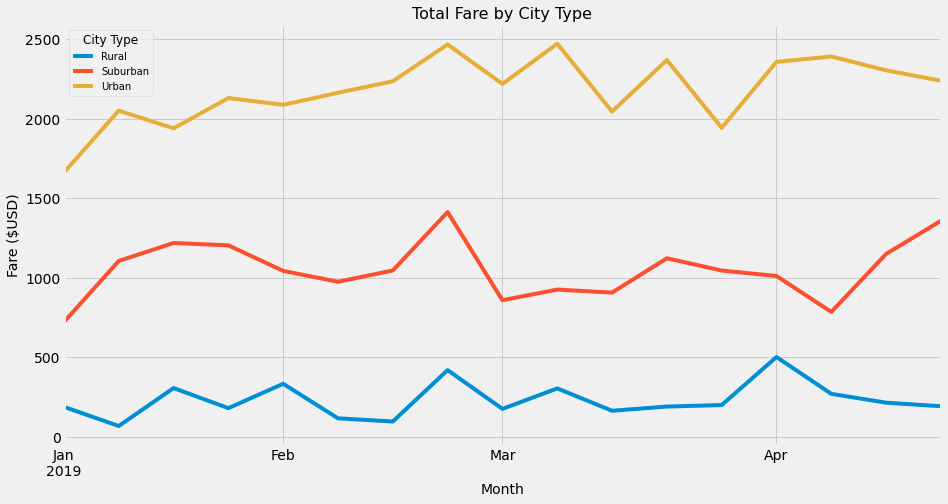

In [103]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.style.use('fivethirtyeight')
weekly_fares_df.plot(figsize=(14, 8))
plt.gcf().subplots_adjust(bottom=0.15)

# Add graph properties
plt.title("Total Fare by City Type", fontsize=16)
plt.ylabel("Fare ($USD)", fontsize=14)
plt.xlabel("Month", fontsize=14)

# Create a legend
lgnd = plt.legend(fontsize="10", loc="best", title="City Type")
lgnd.get_title().set_fontsize(12)

# Save figure
plt.savefig("analysis/PyBer_fare_summary.png")

# Show figure
plt.show()
